Error processing output: not support this file format: C:\Users\fride\Downloads\retail_sales\sales\output


C:\Users\fride\AppData\Local\Temp\ipykernel_7156\2596225181.py:12: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


Data saved to C:\Users\fride\Downloads\retail_sales\sales\output\sales_output.csv.
Summary Statistics:
                          order_date        sales      revenue        stock  \
count                           4047  4047.000000  4047.000000  4047.000000   
mean   2019-09-06 11:42:44.566345472     0.822090     3.388690    15.355819   
min              2019-08-26 00:00:00     0.000000     0.000000     0.000000   
25%              2019-08-28 00:00:00     0.000000     0.000000     5.000000   
50%              2019-09-01 00:00:00     0.000000     0.000000    10.000000   
75%              2019-09-09 00:00:00     0.000000     0.000000    20.000000   
max              2019-10-07 00:00:00    65.000000   214.990000   185.000000   
std                              NaN     2.962524    11.667078    16.423549   

             price  promo_discount_2        month    year   total_sales  
count  4047.000000       4047.000000  4047.000000  4047.0   4047.000000  
mean     13.608648         32.573264 

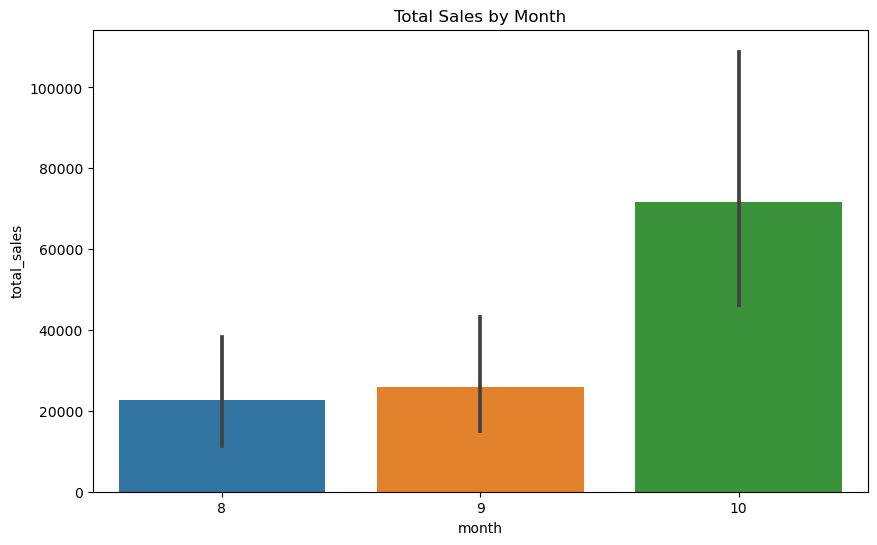

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


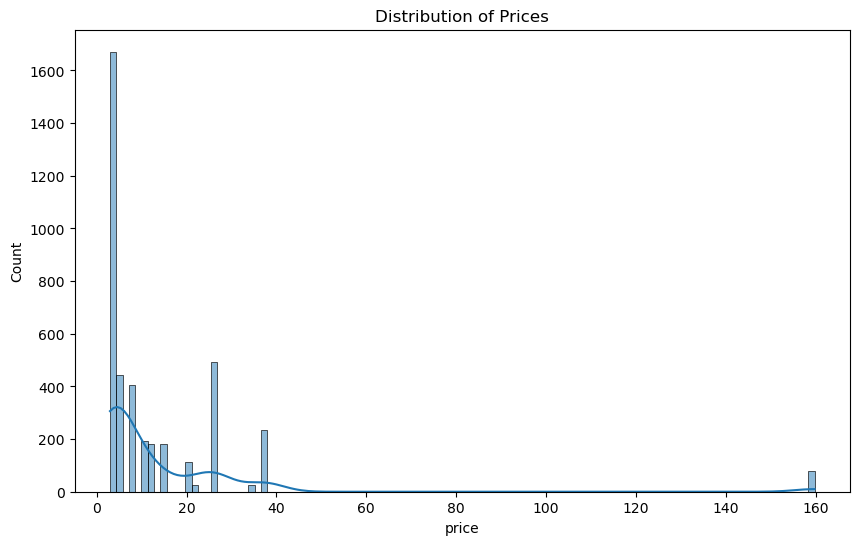

In [9]:
#path:C:\Users\fride\Downloads\retail_sales\sales
import os
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

#Extract process
def extract_data(file_path):
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.xls') or file_path.endswith('xlsx'):
        return pd.read_excel(file_path)
    else:
        raise ValueError(f'not support this file format: {file_path}')

#transform
#-----clean data------#
def clean_data(df):
    df=df.dropna() #for missing value
    df=df.drop_duplicates() #for duplicate rows
    #standardizae column names(leading or trailing whitespace, lower case, adding "_",etc.)
    df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')
    #skip outliers checking since not very common
    return df
def transform_data(df):
    if 'date' in df.columns:
        df.rename(columns={'date': 'order_date'}, inplace= True)
        df['order_date'] = pd.to_datetime(df['order_date'], errors = 'coerce')
        df['month'] = df['order_date'].dt.month
        df['year'] = df['order_date'].dt.year
    #new columns
    if 'sales' in df.columns and 'revenue' in df.columns:
        df['total_sales'] = df['sales'] * df['revenue']
    return df

#load
def load_data(df, output_path):
    df.to_csv(output_path, index=False)
    print(f'Data saved to {output_path}.')

#analysis
def generate_analysis(df):
    print("Summary Statistics:")
    print(df.describe())

    # Plot total sales by month
    if 'month' in df.columns and 'total_sales' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.barplot(x='month', y='total_sales', data=df, estimator=np.sum)
        plt.title('Total Sales by Month')
        plt.show()

    # Plot distribution of prices
    if 'price' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df['price'], kde=True)
        plt.title('Distribution of Prices')
        plt.show()
# --- MAIN PIPELINE FUNCTION --- #
def etl_pipeline(file_dir, output_path):
    """
    Full ETL pipeline that extracts, transforms, and loads data.
    Generates common analysis outputs.
    """
    # Loop through all files in the directory
    for file_name in os.listdir(file_dir):
        file_path = os.path.join(file_dir, file_name)
        
        try:
            # 1. Extract
            df = extract_data(file_path)
            
            # 2. Transform
            df = clean_data(df)
            df = transform_data(df)
            
            # 3. Load
            load_data(df, output_path)
            
            # 4. Analysis Outputs
            generate_analysis(df)
        
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

# --- RUN THE ETL PIPELINE --- #
input_dir = r'C:\Users\fride\Downloads\retail_sales\sales'  # Directory with the input files
output_file = r'C:\Users\fride\Downloads\retail_sales\sales\output\sales_output.csv'  # Output file path

etl_pipeline(input_dir, output_file)    